<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Time Series and Forecasting Techniques</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      margin: 0;
      padding: 20px;
    }
    h1, h2, h4 {
      text-align: center;
    }
    h2 {
      font-size: 1.5em;
      margin-bottom: 10px;
    }
    h4 {
      margin: 5px 0;
    }
  </style>
</head>
<body>
  <div class="center">
    <H1><B>CIA1<B></H1>
    <h2><B>TIME SERIES AND FORECASTING TECHNIQUES<B></h2>
    <h4>NANDHANA RAJEEV</h4>
    <h4>23122125</h4>
    <h4>4 MSC DS B</h4>
  </div>

  </body>
</html>

<B>TOPIC: TIME SERIES ANALYSIS AND FORECASTING USING EXPONENTIAL SMOOTHING<B>

<B>DEFINITION OF TIME SERIES<B>

A time series is a sequence of data points collected or recorded at specific time intervals. These data points are typically arranged in chronological order, allowing for the analysis of trends, patterns, and other characteristics over time.

Examples<BR>
•	Stock Prices: The daily closing prices of a stock over a year.<BR>
•	Weather Data: Hourly temperature readings over a month.<BR>
•	Sales Data: Monthly sales revenue of a company over several years.<BR>
•	Traffic Data: The number of vehicles passing through a toll booth every hour.



<B>OBJECTIVES<B><BR>
1.	Trend Identification: Detecting long-term movements or patterns in the data, such as an upward or downward trend in stock prices.<BR>
2.	Seasonality Detection: Identifying regular patterns or cycles in the data that occur at specific intervals, like higher sales during the holiday season.<BR>
3.	Forecasting: Predicting future values based on historical data. For example, forecasting next month's sales based on past trends.<BR>
4.	Anomaly Detection: Identifying unusual or unexpected data points that deviate significantly from the established pattern, such as a sudden spike in website traffic.<BR>
5.	Correlation and Causality: Understanding the relationship between different time series, such as how interest rates might affect stock prices.<BR>
6.	Smoothing and Noise Reduction: Filtering out random fluctuations to better observe underlying trends and patterns.


<B>DATASET<B><BR>

https://www.kaggle.com/datasets/validmodel/bitcoin-prediction-dataset

<B>DATASET DESCRIPTION<B> <BR>

This dataset provides historical daily price information for Bitcoin (BTC) from October 1, 2013, to November 11, 2013. It offers insights into Bitcoin's price fluctuations during this period. The dataset includes columns for the date, closing price, 24-hour opening price, 24-hour high price, and 24-hour low price. This data can be used for market analysis, predictive modeling, and historical research. However, the dataset has limitations such as a short time span and the absence of additional factors that could influence Bitcoin prices.

<B>INTRODUCTION<B><BR>

This report presents a comprehensive analysis of Bitcoin closing price data using time series techniques. The primary objective is to identify trends, seasonality, and other patterns within the dataset and to forecast future price movements using exponential smoothing methods.By understanding the historical behavior of Bitcoin prices, we can gain valuable insights into market dynamics and potentially make informed investment decisions. This analysis will employ exponential smoothing methods, a powerful tool for time series forecasting.


<B>IMPORTING NECESSARY LIBRARIES<B>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")


<B>LOADING THE DATASET<B>

In [2]:
# Load the dataset
df = pd.read_csv('BTC_USD.csv')

# Display the first few rows
print(df.head())


  Currency        Date  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
0      BTC  2013-10-01            123.65499       124.30466       124.75166   
1      BTC  2013-10-02            125.45500       123.65499       125.75850   
2      BTC  2013-10-03            108.58483       125.45500       125.66566   
3      BTC  2013-10-04            118.67466       108.58483       118.67500   
4      BTC  2013-10-05            121.33866       118.67466       121.93633   

   24h Low (USD)  
0      122.56349  
1      123.63383  
2       83.32833  
3      107.05816  
4      118.00566  


<B>EXPLORATORY DATA ANALYSIS<B>

In [3]:
# Shape of the dataset
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset contains 2787 rows and 6 columns.


In [4]:
# Data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Date                 2787 non-null   object 
 2   Closing Price (USD)  2787 non-null   float64
 3   24h Open (USD)       2787 non-null   float64
 4   24h High (USD)       2787 non-null   float64
 5   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(2)
memory usage: 130.8+ KB
None


In [5]:
# Summary statistics
print(df.describe())

       Closing Price (USD)  24h Open (USD)  24h High (USD)  24h Low (USD)
count          2787.000000     2787.000000     2787.000000    2787.000000
mean           6529.845141     6513.579485     6710.061683    6302.417386
std           10887.847444    10863.800772    11206.779756   10475.811252
min             108.584830      108.584830      118.675000      83.328330
25%             460.087500      459.400500      469.720995     450.818830
50%            2780.182500     2772.367500     2874.696250    2696.457500
75%            8506.923720     8496.887593     8763.291985    8221.060570
max           63346.789035    63562.673545    64801.787870   62094.632914


In [6]:
# Check for missing values
print(df.isnull().sum())


Currency               0
Date                   0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64


Dataset contains no null values

In [7]:
# Basic time series analysis
print(df.describe())  # Summary statistics
print(df['Closing Price (USD)'].corr(df['24h Open (USD)']))  # Correlation between closing and opening price


       Closing Price (USD)  24h Open (USD)  24h High (USD)  24h Low (USD)
count          2787.000000     2787.000000     2787.000000    2787.000000
mean           6529.845141     6513.579485     6710.061683    6302.417386
std           10887.847444    10863.800772    11206.779756   10475.811252
min             108.584830      108.584830      118.675000      83.328330
25%             460.087500      459.400500      469.720995     450.818830
50%            2780.182500     2772.367500     2874.696250    2696.457500
75%            8506.923720     8496.887593     8763.291985    8221.060570
max           63346.789035    63562.673545    64801.787870   62094.632914
0.9988922330633319


In [8]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Set 'Date' as the index
df.set_index('Date', inplace=True)


In [9]:
# Display the first few rows of the dataset
print(df.head())

           Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC            123.65499       124.30466       124.75166   
2013-10-02      BTC            125.45500       123.65499       125.75850   
2013-10-03      BTC            108.58483       125.45500       125.66566   
2013-10-04      BTC            118.67466       108.58483       118.67500   
2013-10-05      BTC            121.33866       118.67466       121.93633   

            24h Low (USD)  
Date                       
2013-10-01      122.56349  
2013-10-02      123.63383  
2013-10-03       83.32833  
2013-10-04      107.05816  
2013-10-05      118.00566  


<b>TIME SERIES VISUALIZATION<B>

Plotting each time series variable to visually inspect trends, seasonality, and other patterns.

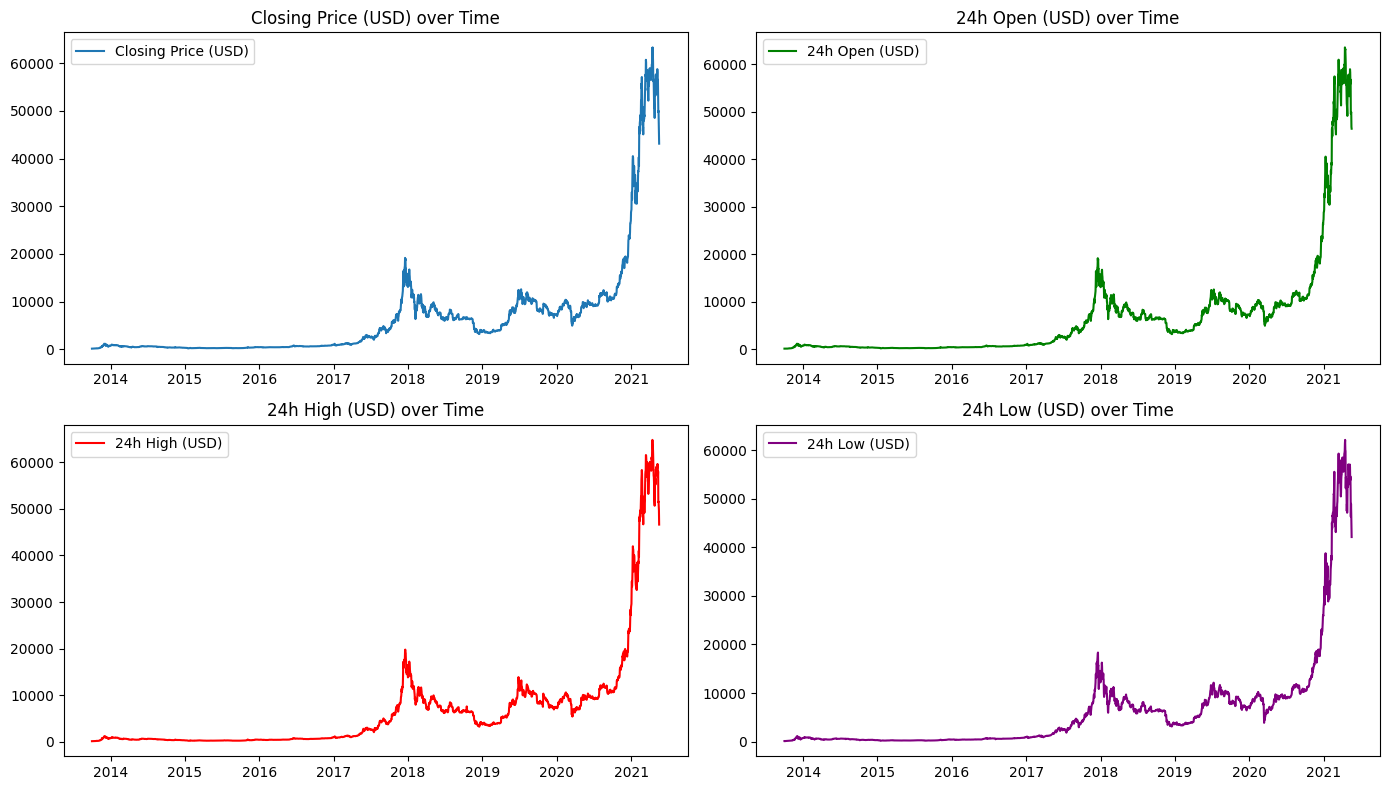

In [10]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.plot(df['Closing Price (USD)'], label='Closing Price (USD)')
plt.title('Closing Price (USD) over Time')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['24h Open (USD)'], label='24h Open (USD)', color='green')
plt.title('24h Open (USD) over Time')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['24h High (USD)'], label='24h High (USD)', color='red')
plt.title('24h High (USD) over Time')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['24h Low (USD)'], label='24h Low (USD)', color='purple')
plt.title('24h Low (USD) over Time')
plt.legend()

plt.tight_layout()
plt.show()


The image displays four time series plots representing different aspects of Bitcoin (BTC) price data over a period spanning from 2014 to 2021:

1. Closing Price (USD) over Time: This plot showcases the daily closing price of Bitcoin in US dollars. It reveals a significant upward trend throughout the analyzed period, with periods of rapid growth and subsequent corrections.

2. 24h Open (USD) over Time: This plot illustrates the daily opening price of Bitcoin. The overall trend aligns with the closing price, indicating a consistent upward movement. However, there are noticeable fluctuations between the opening and closing prices, suggesting daily volatility.

3. 24h High (USD) over Time: This plot depicts the highest price reached by Bitcoin during each day. It generally follows the upward trend of the other plots, but with more pronounced peaks, reflecting the maximum price levels attained.

4. 24h Low (USD) over Time: This plot represents the lowest price reached by Bitcoin during each day. While it also shows an upward trend, the peaks are less pronounced compared to the 24h High, indicating the minimum price levels.

Overall, the plots demonstrate a significant increase in Bitcoin's price over the analyzed period, with periods of rapid growth and subsequent corrections. The 24h Open, High, and Low plots provide insights into the daily volatility and price fluctuations within the overall upward trend.

<b>Focusing on variable 'Closing Price'</b>

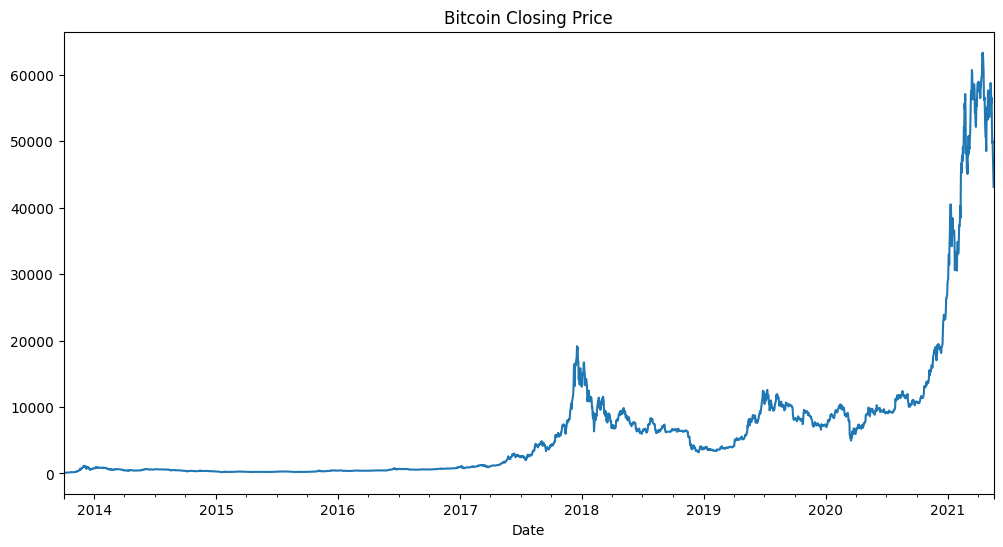

In [11]:
# Plotting
import matplotlib.pyplot as plt

df['Closing Price (USD)'].plot(figsize=(12, 6), title='Bitcoin Closing Price')
plt.show()

The 'Closing Price' variable clearly indicates upward trend

<b>Checking whether the data is stationary or not</b>

In [12]:
import pandas as pd
import statsmodels.tsa.stattools as ts

# Check for stationarity using the Augmented Dickey-Fuller (ADF) test
adf_result = ts.adfuller(df['Closing Price (USD)'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Interpret the results
if adf_result[1] > 0.05:
    print('The time series is non-stationary.')
else:
    print('The time series is stationary.')

ADF Statistic: -0.481789758159286
p-value: 0.8955213820284771
The time series is non-stationary.


This implies data is non-stationary

<b>IDENTIFY AND INTERPRET THE COMPONENTS</b>

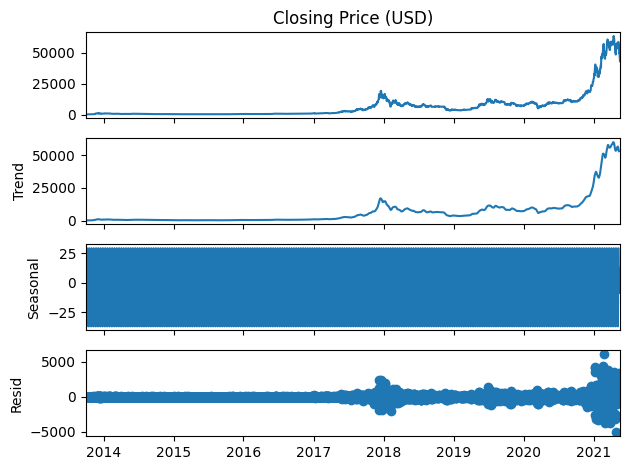

In [13]:
# Decompose the 'Closing Price (USD)' variable 
result = seasonal_decompose(df['Closing Price (USD)'], period=12)

# Plot the decomposition
result.plot()
plt.show()

# Inspect the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid


The decomposition suggests that the primary driver of Bitcoin's price during the analyzed period is a long-term upward trend. There is no strong evidence of seasonal patterns, and the remaining variation appears to be random noise. 

<b>DETERMINE ADDITIVE OR MULTIPLICATIVE MODEL</b>

Based on the provided time series decomposition plot, it appears that an additive model is more suitable for the Bitcoin closing price data.

Reasons:

Flat Seasonal Component: The seasonal component is relatively flat, indicating that there are no significant seasonal patterns in the data. This suggests that the seasonal fluctuations do not depend on the overall level of the trend.
Constant Residual Variance: The residuals (the difference between the actual values and the values predicted by the trend and seasonal components) seem to have a relatively constant variance. This is more consistent with an additive model, where the impact of the components is independent of each other.

However, based on the visual evidence in this case, an additive model seems to be a more suitable choice.

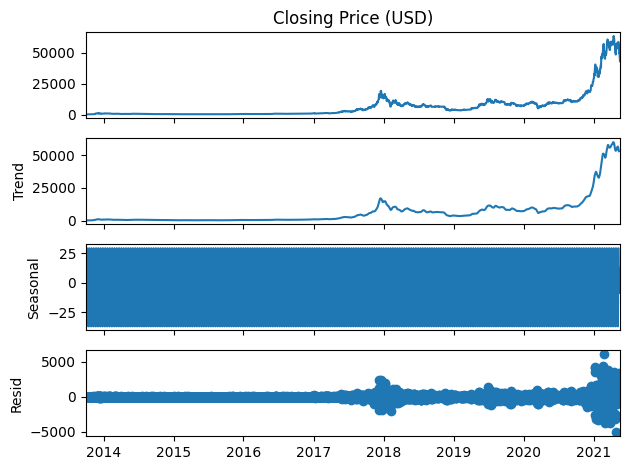

In [14]:
# Decompose the 'Closing Price (USD)' variable using additive model
result = seasonal_decompose(df['Closing Price (USD)'],model="add" ,period=12)

# Plot the decomposition
result.plot()
plt.show()

# Inspect the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid


<b>ELIMINATING THE IDENTIFIED COMPONENT</b>

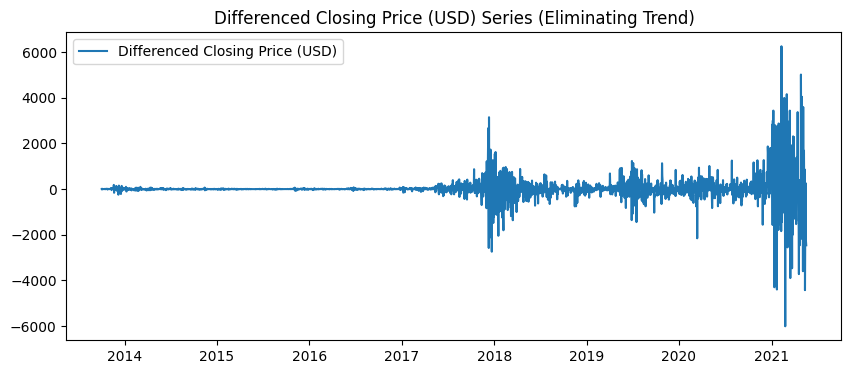

In [15]:
# Eliminate the trend component by differencing
differenced = df['Closing Price (USD)'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 4))
plt.plot(differenced, label='Differenced Closing Price (USD)')
plt.title('Differenced Closing Price (USD) Series (Eliminating Trend)')
plt.legend()
plt.show()


Based on the provided plot of the differenced closing price series, it appears that the trend component has been successfully eliminated.

The differenced series appears to be relatively stationary, meaning that the mean and variance are constant over time. This is a key characteristic of a stationary series, which is often a requirement for many time series forecasting models.

Key Observations:

Reduced Trend: The upward trend observed in the original closing price series is no longer apparent in the differenced series.
Stationarity: The differenced series appears to fluctuate around a constant mean, suggesting stationarity.
Randomness: The fluctuations in the differenced series seem to be random, without any clear patterns or trends.

In conclusion, the differencing operation has successfully eliminated the trend component from the Bitcoin closing price data, making the series more suitable for further analysis and forecasting using stationary time series models.

<b>FORECAST USING EXPONENTIAL SMOOTHING<b>

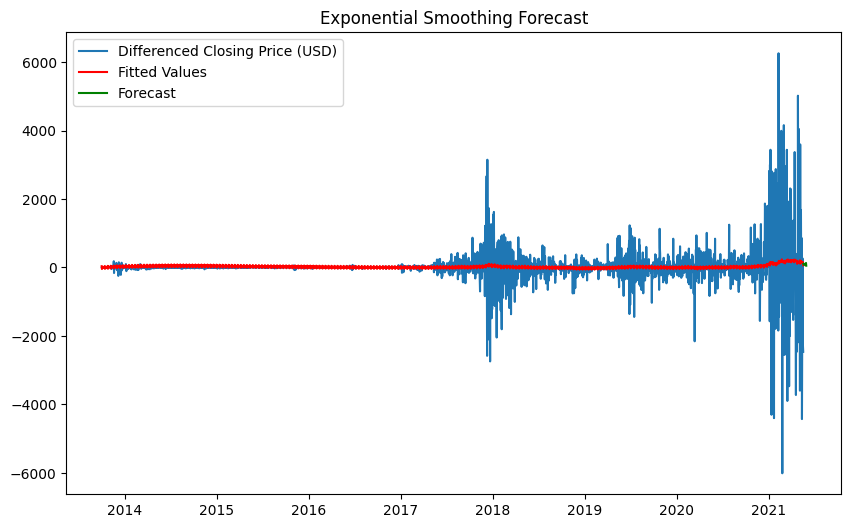

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Apply Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(differenced, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Forecast the next 12 periods
forecast = fit.forecast(12)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(differenced, label='Differenced Closing Price (USD)')
plt.plot(fit.fittedvalues, label='Fitted Values', color='red')
plt.plot(forecast, label='Forecast', color='green')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()


Key Observations:

Model Fit: The fitted values (red line) closely follow the differenced closing price series (blue line), indicating that the exponential smoothing model is able to capture the underlying dynamics of the data.

Forecast: The forecast (green line) suggests a continuation of the recent trend in the differenced series. However, it's important to note that the forecast accuracy can be affected by factors such as model assumptions, data noise, and unforeseen events.

Residuals: The residuals (the difference between the actual values and the fitted values) appear to be relatively random, suggesting that the model is capturing the systematic patterns in the data. However, there are some noticeable outliers, which might indicate that the model could be improved.

In [17]:
import statsmodels.tsa.stattools as ts

# Perform ADF test
adf_result = ts.adfuller(differenced)

# Print the results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -7.802415807861538
p-value: 7.432448804368075e-12
Critical Values:
1%: -3.4327241019050643
5%: -2.862588908594463
10%: -2.5673283673779763


The ADF result ensures that the data is stationary

<b>EVALUATE THE FORECAST</b>

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# Calculate Mean Squared Error
mse = mean_squared_error(differenced[-12:], forecast)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(differenced[-12:], forecast)
print(f'Mean Absloute Error: {mae}')
mape = mean_absolute_percentage_error(differenced[-12:], forecast)
print(f'Mean Absloute Percentage Squared Error: {mse}')
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 4529321.908963372
Mean Absloute Error: 1760.2072144568067
Mean Absloute Percentage Squared Error: 4529321.908963372
Root Mean Squared Error: 2128.2203619370275


<B>CONCLUSION<B>

The analysis involved loading the Bitcoin closing price data, conducting exploratory data analysis, differencing to eliminate the trend, and applying a Holt-Winters exponential smoothing model.
Based on the analysis, the upward trend in the price is evident, accompanied by significant volatility. While there is no clear evidence of seasonal patterns, the exponential smoothing model provided a reasonable forecast of the future trend. Further research could explore non-linear relationships, external factors, and alternative forecasting models to gain a deeper understanding of Bitcoin's price dynamics and improve prediction accuracy.